In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import matplotlib.pyplot as plt
import seaborn as sb    
import scipy.stats as stats

##  All training data sets evaluation 

In [17]:
dfall=rm.comb_eval(models=['Md','Ni','Ib','Wm','De','So','Hc','Md-loo','Ni-loo','Ib-loo','Wm-loo','De-loo','So-loo'],eval_t = 'eval')

In [3]:
dfall['model'].fillna('avg',inplace=True)

In [4]:
dfall['nanY']=np.isnan(dfall.noiseceiling_Y)
dfall['nanXY']=np.isnan(dfall.noiseceiling_XY)
dfall['nanXR']=np.isnan(dfall.noise_X_R)

In [5]:
pd.pivot_table(data=dfall[dfall.model=='loo'],index='train_dataset',columns='eval_dataset',values='R_eval',aggfunc='count')

eval_dataset,Demand,IBC,MDTB,Nishimoto,Somatotopic,WMFS
train_dataset,,,,,,
Demand,333.0,NaN,NaN,NaN,NaN,NaN
IBC,NaN,108.0,NaN,NaN,NaN,NaN
MDTB,NaN,NaN,216.0,NaN,NaN,NaN
Nishimoto,NaN,NaN,NaN,54.0,NaN,NaN
Somatotopic,NaN,NaN,NaN,NaN,72.0,NaN
WMFS,NaN,NaN,NaN,NaN,NaN,144.0


## Overfitting to subjects 
To study overfitting of the group model to the subjects/data contained in training and test set
We compare the full group model with the leave-one-subject out...
Results indicate very strong overfitting

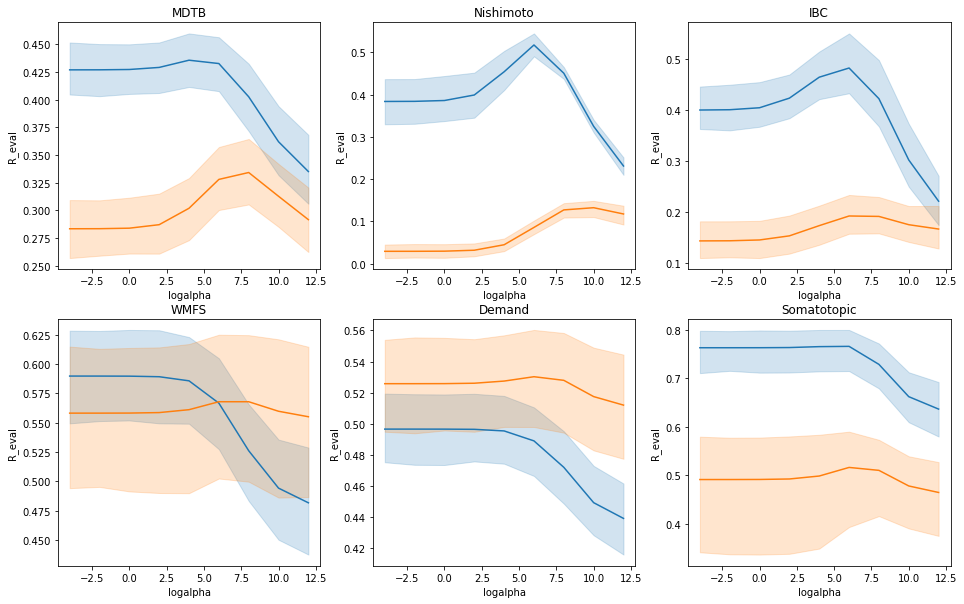

In [6]:
plt.figure(figsize=(16,10))
evd=['MDTB','Nishimoto','IBC','WMFS','Demand','Somatotopic']

for i,ed in enumerate(evd):
    ax=plt.subplot(2,3,i+1)
    d=dfall[(dfall.eval_dataset==ed) & (dfall.train_dataset==ed)]
    plt.title(ed)
    sns.lineplot(data=d,y='R_eval',x='logalpha',hue='model',legend=None)

In [7]:
df=dfall[(dfall.eval_dataset=='MDTB') & (dfall.train_dataset=='MDTB') & (dfall.logalpha==8)] 
df.pivot_table(index=None,columns='model',values='R_eval',aggfunc='mean')

model,avg,loo
R_eval,0.40261,0.334225


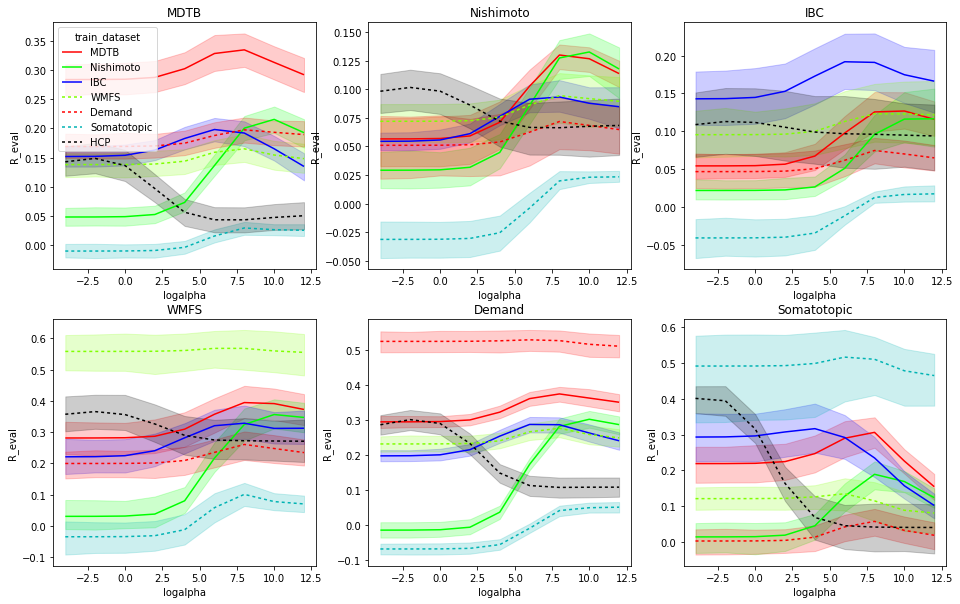

In [8]:
plt.figure(figsize=(16,10))
evd=['MDTB','Nishimoto','IBC','WMFS','Demand','Somatotopic']
ho = ['MDTB','Nishimoto','IBC','WMFS','Demand','Somatotopic','HCP']
palette = [[1,0,0],[0,1,0],[0,0,1],[0.5,1,0],[1,0,0],[0,0.7,0.7],[0,0,0]]
dashes = [[1,0],[1,0],[1,0],[2,2],[2,2],[2,2],[2,2]]

for i,ed in enumerate(evd):
    ax=plt.subplot(2,3,i+1)
    d=dfall[(dfall.eval_dataset==ed) 
            & ((dfall.train_dataset!=ed) 
            | (dfall.model=='loo'))]
    plt.title(ed)
    if i==0:
        sns.lineplot(data=d,y='R_eval',x='logalpha',hue='train_dataset',        palette=palette,style='train_dataset',
        hue_order=ho,style_order=ho,
        dashes=dashes)
    else: 
        sns.lineplot(data=d,y='R_eval',x='logalpha',hue='train_dataset',palette=palette,style='train_dataset',
        hue_order=ho,style_order=ho,dashes=dashes,legend=None)


<AxesSubplot:xlabel='logalpha', ylabel='R_eval'>

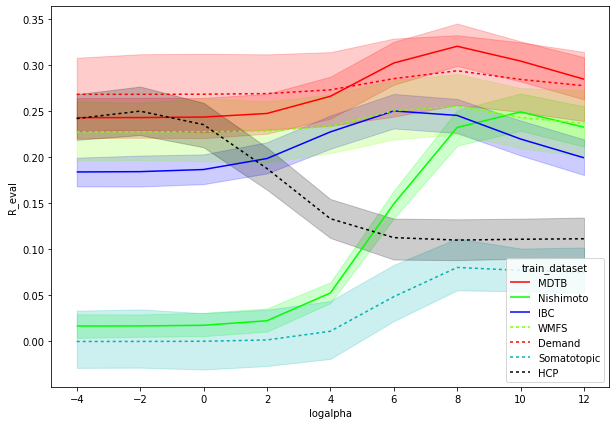

In [9]:
# Plot all evaluations on different datasets 
plt.figure(figsize=(10,7))
d=dfall[(dfall.train_dataset!=dfall.eval_dataset) | (dfall.model=='loo')]
sns.lineplot(data=d,y='R_eval',x='logalpha',
             hue='train_dataset',style='train_dataset',
             hue_order=ho,style_order=ho,
             palette=palette,dashes=dashes)


In [10]:
# determine best logalpha for each model 
pd.pivot_table(d,index=['train_dataset'],columns=['logalpha'],values=['R_eval'],aggfunc='mean')

R_eval                                                    \
logalpha          -4.0      -2.0       0.0       2.0       4.0       6.0    
train_dataset                                                               
Demand         0.267839  0.267852  0.267950  0.268641  0.272700  0.284838   
HCP            0.241534  0.249599  0.234926  0.187297  0.132824  0.112273   
IBC            0.183553  0.183890  0.186206  0.198128  0.227038  0.249815   
MDTB           0.242519  0.242597  0.243166  0.247052  0.265722  0.301846   
Nishimoto      0.016305  0.016399  0.017092  0.022045  0.052162  0.148874   
Somatotopic   -0.000483 -0.000456 -0.000260  0.001166  0.010611  0.048155   
WMFS           0.227078  0.227093  0.227207  0.228026  0.233185  0.249870   

                                             
logalpha           8.0       10.0      12.0  
train_dataset                                
Demand         0.293441  0.283996  0.277224  
HCP            0.109592  0.110507  0.111018  
IBC            0.244924  0.219316  0.198928  
MDTB           0.320019  0.303951  0.284262  
Nishimoto      0.231855  0.248718  0.232156  
Somatotopic    0.079906  0.076700  0.074952  
WMFS           0.254987  0.242680  0.236211

In [11]:
A = pd.pivot_table(d,index=['train_dataset'],columns=['logalpha'],values=['R_eval'])
B = np.nan_to_num(A.values)
ind = B.argmax(axis=1)
log_a=np.array(A.columns.get_level_values(1)[ind])
bestla = pd.DataFrame(log_a,index=A.index,columns=['best_logalpha'])
bestla

,best_logalpha
train_dataset,
Demand,8.0
HCP,-2.0
IBC,6.0
MDTB,8.0
Nishimoto,10.0
Somatotopic,8.0
WMFS,8.0


## Summary Graph of all evaluated at their best hyperparameters


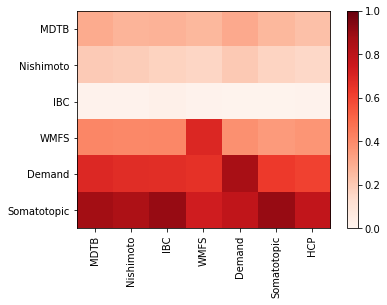

In [21]:

dfall['isbest'] = dfall.logalpha.values  == bestla.loc[dfall.train_dataset].values.flatten()
d=dfall[((dfall.train_dataset!=dfall.eval_dataset) | (dfall.model=='loo'))& dfall.isbest]


V=pd.pivot_table(d,index=['eval_dataset'],columns=['train_dataset'],values=['R_eval'])
A=pd.pivot_table(d,index=['eval_dataset'],columns=['train_dataset'],values=['noiseceiling_XY'])

V=V.iloc[[2,3,1,5,0,4],[3,4,2,6,0,5,1]]
A=A.iloc[[2,3,1,5,0,4],[3,4,2,6,0,5,1]]

plt.imshow(V.values/A.values,cmap='Reds',vmin=0,vmax=1)
ax=plt.gca()
ev_labels = V.index.values
tr_labels = A.columns.get_level_values(1).values
plt.xticks(np.arange(7),tr_labels)
ax.set_xticklabels(tr_labels, rotation = 90)
plt.yticks(np.arange(6),ev_labels)
plt.colorbar()

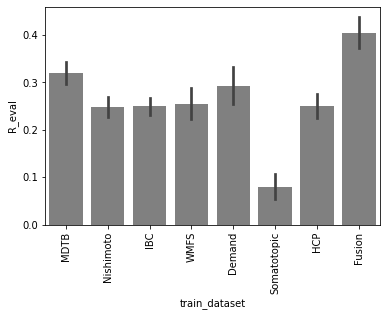

In [13]:
# Add the favorite Fusion model
dfuse = dfall=rm.comb_eval(models=['Fu05-loo'],eval_t = 'eval_noint')
dall = pd.concat([d,dfuse],ignore_index=True)
ho = ['MDTB','Nishimoto','IBC','WMFS','Demand','Somatotopic','HCP','Fusion']
palette = [[1,0,0],[0,1,0],[0,0,1],[0.5,1,0],[1,0,0],[0,0.7,0.7],[0,0,0]]
sb.barplot(data=dall,x='train_dataset',y='R_eval',order=ho,color=[0.5,0.5,0.5])
ax=plt.gca()
a=ax.set_xticklabels(ho, rotation = 90)


In [14]:
t=stats.ttest_rel(dall[dall['train_dataset']=='MDTB']['R_eval'],
                  dall[dall['train_dataset']=='Fusion']['R_eval']) 
indx =dall['train_dataset']=='MDTB'
df=indx.sum()-1
print(f't({df}) = {t.statistic:.3f}, p={t.pvalue:.4f}')

t(102) = -8.351, p=0.0000


In [15]:
# What predicition accuracy relative to noise-ceiling?  

print(f"R_eval {dfuse.R_eval.mean():.4f} + {dfuse.R_eval.std():.2f}")
adj = dfuse.R_eval.mean() / dfuse.noiseceiling_XY.mean() 
print(f"R_eval {adj:.4f} ") 

0.7006**2

R_eval 0.4050 + 0.17
R_eval 0.7006 


0.49084036